In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = {
    "Model": ["GPT-2 (OpenAI)", "T5 (Google)", "Mistral (Mistralai)", "Falcon (TIIUAE)", "BLOOM (BigScience)"],
    "BLEU Score": [0.32, 0.35, 0.38, 0.33, 0.30],
    "ROUGE Score": [48.2, 51.1, 50.3, 49.5, 47.8],
    "METEOR Score": [0.42, 0.45, 0.44, 0.43, 0.41]
}

df = pd.DataFrame(data)

print(df)


                 Model  BLEU Score  ROUGE Score  METEOR Score
0       GPT-2 (OpenAI)        0.32         48.2          0.42
1          T5 (Google)        0.35         51.1          0.45
2  Mistral (Mistralai)        0.38         50.3          0.44
3      Falcon (TIIUAE)        0.33         49.5          0.43
4   BLOOM (BigScience)        0.30         47.8          0.41


In [4]:
weights = np.array([1, 1, -1])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 1:])
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[1:], index=df['Model'])
df_normalized

,BLEU Score,ROUGE Score,METEOR Score
Model,,,
GPT-2 (OpenAI),-0.586588,-0.950378,-0.707107
T5 (Google),0.513265,1.385296,1.414214
Mistral (Mistralai),1.613118,0.740972,0.707107
Falcon (TIIUAE),-0.219971,0.096649,0.000000
BLOOM (BigScience),-1.319824,-1.272539,-1.414214


In [5]:
weighted_normalized_data = normalized_data * weights

df_weighted_normalized = pd.DataFrame(weighted_normalized_data, columns=df.columns[1:], index=df['Model'])
df_weighted_normalized

,BLEU Score,ROUGE Score,METEOR Score
Model,,,
GPT-2 (OpenAI),-0.586588,-0.950378,0.707107
T5 (Google),0.513265,1.385296,-1.414214
Mistral (Mistralai),1.613118,0.740972,-0.707107
Falcon (TIIUAE),-0.219971,0.096649,-0.000000
BLOOM (BigScience),-1.319824,-1.272539,1.414214


In [6]:
ideal_best = np.max(weighted_normalized_data, axis=0)
ideal_worst = np.min(weighted_normalized_data, axis=0)

# Calculate distances to ideal best and worst
distance_best = np.sqrt(((weighted_normalized_data - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_normalized_data - ideal_worst) ** 2).sum(axis=1))

# Compute TOPSIS scores
topsis_scores = distance_worst / (distance_best + distance_worst)

# Rank models based on scores
df['TOPSIS Score'] = topsis_scores
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

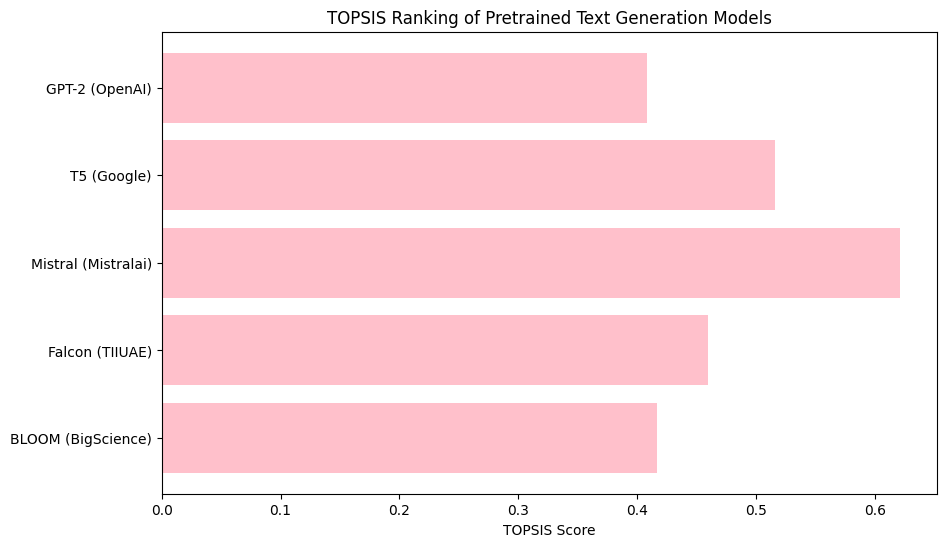

,Model,BLEU Score,ROUGE Score,METEOR Score,TOPSIS Score,Rank
2,Mistral (Mistralai),0.38,50.3,0.44,0.620646,1.0
1,T5 (Google),0.35,51.1,0.45,0.515481,2.0
3,Falcon (TIIUAE),0.33,49.5,0.43,0.459748,3.0
4,BLOOM (BigScience),0.30,47.8,0.41,0.416773,4.0
0,GPT-2 (OpenAI),0.32,48.2,0.42,0.408340,5.0


In [8]:
plt.figure(figsize=(10,6))
plt.barh(df['Model'], df['TOPSIS Score'], color='pink')
plt.xlabel('TOPSIS Score')
plt.title('TOPSIS Ranking of Pretrained Text Generation Models')
plt.gca().invert_yaxis()
plt.show()

# Display final ranked results
df.sort_values(by='Rank')